## 머신러닝을 이용한 트래픽 분석

In [ ]:
# 필요한 모듈들 import
from os.path import join
from glob import glob
import pandas as pd
import numpy as np

In [ ]:
# 구글 드라이브 마운트
from google.colab import drive
drive.mount('/content/drive')

# benign 파일과 malicious 파일의 경로
benign_path = '/content/drive/MyDrive/Colab Notebooks/traffic/train/benign'
malicious_path = '/content/drive/MyDrive/Colab Notebooks/traffic/train/malicious'

# 경로에 있는 csv 파일 목록 리스트에 저장
benign_list = sorted(glob(join(benign_path, '*.csv')))
malicious_list = sorted(glob(join(malicious_path, '*.csv')))

Mounted at /content/drive


In [ ]:
# 데이터 전처리
train_b = pd.DataFrame() # benign 패킷을 담을 데이터 프레임

for list in benign_list :
  tmp = pd.read_csv(list, error_bad_lines=False)
  tmp = tmp[(tmp['_ws.col.Protocol']=='TCP') | (tmp['_ws.col.Protocol']=='FTP')] # TCP와 FTP 패킷만 이용
  tmp = tmp.sample(frac=0.001).reset_index(drop=True) # 0.1%만 샘플링
  train_b = train_b.append(tmp)
train_b['B/M'] = 'b' # benign 데이터임을 나타내는 label 열 추가

train_m = pd.read_csv(malicious_list[0], error_bad_lines=False) # malicious 패킷을 담을 데이터 프레임
train_m['B/M'] = 'r' # malicious 데이터임을 나타내는 label 열 추가

<ipython-input-3-be433bbb3d0a>:5: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  tmp = pd.read_csv(list, error_bad_lines=False)
<ipython-input-3-be433bbb3d0a>:8: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  train_b = train_b.append(tmp)
<ipython-input-3-be433bbb3d0a>:5: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  tmp = pd.read_csv(list, error_bad_lines=False)
<ipython-input-3-be433bbb3d0a>:8: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  train_b = train_b.append(tmp)
<ipython-input-3-be433bbb3d0a>:5: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in

In [ ]:
data_frame = pd.concat([train_b, train_m]) # benign과 malicious 데이터를 이어붙임
data_frame = data_frame.fillna(0) # NaN을 0으로 치환
data_frame['ip.src'] = data_frame['ip.src'].str.replace('.','')
data_frame['ip.dst'] = data_frame['ip.dst'].str.replace('.','')
data_frame['ip.src'] = data_frame['ip.src'].astype(int)
data_frame['ip.dst'] = data_frame['ip.dst'].astype(int)
data_frame.head()

<ipython-input-7-337566219ce8>:3: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  data_frame['ip.src'] = data_frame['ip.src'].str.replace('.','')
<ipython-input-7-337566219ce8>:4: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  data_frame['ip.dst'] = data_frame['ip.dst'].str.replace('.','')


,_ws.col.UTCtime,_ws.col.Protocol,ip.src,ip.dst,tcp.srcport,tcp.dstport,tcp.len,tcp.seq,tcp.ack,udp.srcport,...,http.request.uri,http.user_agent,http.connection,http.host,http.response.code,http.server,http.content_type,http.content_length,http.cache_control,B/M
0,12:15:50.360531,TCP,13107450,1921681014,80.0,50095.0,2920.0,474774922.0,39936.0,0.0,...,0,0,0,0,0.0,0,0,0.0,0,b
1,12:17:06.027934,TCP,13107450,1921681014,80.0,50095.0,1460.0,893845333.0,66946.0,0.0,...,0,0,0,0,0.0,0,0,0.0,0,b
2,12:14:58.920932,TCP,1921681014,13107450,50095.0,80.0,0.0,25336.0,284005985.0,0.0,...,0,0,0,0,0.0,0,0,0.0,0,b
3,12:16:23.318015,TCP,13107450,1921681014,80.0,50095.0,1460.0,658717553.0,51616.0,0.0,...,0,0,0,0,0.0,0,0,0.0,0,b
4,12:16:45.739781,TCP,13107450,1921681014,80.0,50095.0,2920.0,783488725.0,59646.0,0.0,...,0,0,0,0,0.0,0,0,0.0,0,b


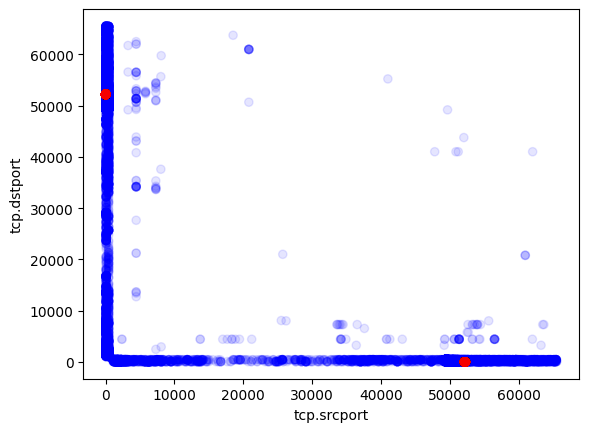

In [ ]:
# Feature 정보 시각화
# Load our data from the csv file
import matplotlib.pyplot as plt

fig = plt.figure()

ax = fig.add_subplot()
ax.set_xlabel('tcp.srcport')
ax.set_ylabel('tcp.dstport')

# ax = fig.add_subplot(projection = "3d")
# ax.set_xlabel('tcp.seq')
# ax.set_ylabel('tcp.ack')
# ax.set_zlabel('tcp.len')

ax.scatter(x=data_frame['tcp.srcport'], y=data_frame['tcp.dstport'], c=data_frame['B/M'], alpha=0.1)
# ax.scatter(xs=data_frame['tcp.seq'], ys=data_frame['tcp.ack'], zs=data_frame['tcp.len'], c=data_frame['B/M'], alpha = 0.1)


plt.show()

In [ ]:
data = data_frame[:].to_numpy()

data_input = data[:,:22] # 0~ 21번 열
data_target = data[:,22] # 22번 열(label)

In [ ]:
# data를 train set과 test set으로 split (75 : 25)
from sklearn.model_selection import train_test_split
train_input, test_input, train_target, test_target = train_test_split(data_input, data_target, random_state=40)

In [ ]:
# Logistic Regression 사용
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression()
lr.fit(train_input[:,2:9], train_target) # train set 학습

# 결과
lr_output = lr.predict(test_input[:,2:9])
print('Number of malicious packet : ', np.count_nonzero(lr_output == 'r'))
print('Accuracy : %.1f%%' %(lr.score(test_input[:,2:9], test_target) * 100))

Number of malicious packet :  0
Accuracy : 90.0%


In [ ]:
# Logistic Regression 사용
from sklearn.linear_model import LogisticRegression

w = {'b':40, 'r':60} # 데이터 불균형 해결을 위해 Weight Balancing

lr = LogisticRegression(class_weight=w)
lr.fit(train_input[:,4:9], train_target) # train set 학습

# 결과
lr_output = lr.predict(test_input[:,4:9])
print('Number of malicious packet : ', np.count_nonzero(lr_output == 'r'))
print('Accuracy : %.1f%%' %(lr.score(test_input[:,4:9], test_target) * 100))

Number of malicious packet :  738
Accuracy : 95.6%


In [ ]:
# Random Forest 사용
from sklearn.ensemble import RandomForestClassifier

forest = RandomForestClassifier()
forest.fit(train_input[:,2:9], train_target)

forest_output = forest.predict(test_input[:,2:9])
print('Number of malicious packet : ', np.count_nonzero(forest_output == 'r'))
print('Accuracy : %.1f%%' %(forest.score(test_input[:,2:9], test_target) * 100))

Number of malicious packet :  513
Accuracy : 100.0%
